<a href="https://colab.research.google.com/github/harmanpreet93/ift6758-data-science/blob/master/Unsupervised_learning_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

## Clustering

1. [ISLR 10.7.1]
  a. Prove $$\frac{1}{\left|C_k\right|} \sum_{i, i^\prime \in  C_k} \sum_{j = 1}^{p} \left(x_{ij} - x_{i^\prime j}\right)^2 = 2 \sum_{i \in C_k}\sum_{j = 1}^{p} \left(x_{ij} - \bar{x}_{kj}\right)^2$$
  using the notation from the discussion in section 10.3.1 of the reading.
  
  b. Using this identity, argue that the $K$-means clustering algorithm decreases the objective 
  
  $$
  \sum_{k = 1}^{K} \frac{1}{\left|C_k\right|} \sum_{i, i^\prime \in C_k} \sum_{j=1}^{p} \left(x_{ij} - x_{i^\prime j}\right)^2
  $$
  
  during each iteration.

Solution: (a) To simplify notation, we'll use vector notation, so $\|a\|_{2}^{2} = \sum_{j = 1}^{p} a_{j}^{2}$ and  $a^T b = \sum_{j = 1}^{p} a_{j}b_{j}$, though the same argument works with ordinary summations. First, consider the sums in the left hand side,

$
\begin{align}
\sum_{i, i^\prime \in C_k} \|x_i - x_{i^{\prime}}\|_{2}^{2}  &= \sum_{i, i^{\prime} \in C_k} \left[\|x_{i}\|_{2}^2 + \|x_{i^\prime}\|^2_{2}  - 2x_{i}^{T}x_{i^\prime}\right] \\
&= \sum_{i \in C_k}\left|C_{k}\right|\|x_{i}\|_{2}^{2} + \sum_{i^\prime \in C_k}\left|C_{k}\right|\|x_{i^\prime}\|_{2}^{2} - 2\left(\left|C_{k}\right|\bar{x}_{k}\right)^T\left(\left|C_{k}\right|\bar{x}_{k}\right)
\end{align}
$

where in the last step, we (1) distributed the summations through, collecting terms that didn't depend on the index, and (2) used the fact that $\sum_{i \in C_{k}} x_{i} =   \left|C_{k}\right| \bar{x}_{k}$. The first two terms are identical, since they differ only in indexing variable, and the last term can be expressed as a norm, $2 \left|C_{k}\right|^2\|\bar{x}_{k}\|_{2}^{2}$. Combining these facts, the expression simplifies to

$
\begin{align}
2\left|C_k\right|\left[\sum_{i \in C_k}\|x_i\|_2^2 - \left|C_k\right|\|\bar{x}_k\|^2_2\right]
\end{align}
$

Next, consider the right hand side. Using the fact that $\bar{x}_k$ does not depend on the index, $i$, and again the fact that $\sum_{i \in C_k} x_i = \left|C_k\right|\bar{x}_k$, we find

$
\begin{align}
\sum_{i \in C_k}\|x_i - \bar{x}_k\|_2^2 &= \sum_{i \in C_k}\left[\|x_i\|_2^2 + \|\bar{x}_k\|_2^2 - 2x_i^T\bar{x}_k\right] \\
&= \sum_{i \in C_k}\|x_i\|_2^2 + \left|C_k\right|\|\bar{x}_k\|^2_2  - 2\left|C_k\right|\bar{x}_k^T \bar{x}_k \\
&= \sum_{i \in C_k}\|x_i\|_2^2 - \left|C_k\right|\|\bar{x}_k\|_2^2
\end{align}
$

Comparing the left and right hand sides and scaling by the appropriate factors $\frac{1}{\left|C_k\right|}$ and 2, we obtain the required identity.

(b) The two steps of $K$-means each decrease the expression on the right hand side. Let $\mu\left(C^t_k\right)$ be the mean of the $k^th$ cluster at time $t$, and consider the loss at time $t$,

$$
\sum_{k = 1}^{K}\sum_{i \in C_k^t} \|x_i - \mu\left(C_k^t\right)\|_2^2.
$$

The cluster reassignment step  finds a $C_k^t \rightarrow C_k^{t + 1}$ that reduces this overall loss, since any point $x_i$ is only moved if it is now closer to its cluster mean. Similarly, the change from $\mu\left(C_k^t\right) \rightarrow \mu\left(C_k^{t + 1}\right)$ also reduces the loss, since the sample mean minimizes the squared distance within a collection of points.

By part (a), this objective is exactly equal to the one specified in the statement of  (b). Since we've argued that this objective must monotonically decrease, it must also be the case that the  one in the problem statement does as well.


2. [ISLR 10.7.4] Suppose that for a particular data set, we perform hierarchical clustering using single inkage and using complete linkage. We obtain two dendrograms.

  a. At a certain point on the single linkage dendrogram, the clusters $\{1, 2, 3\}$ and $\{4, 5\}$ fuse. On the complete linkage dendrogram, the clusters $\{1, 2,3 \}$ and $\{4, 5\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?
  
  b. At a certain point on the single linkage dendrogram, the clusters $\{5\}$ and $\{6\}$ fuse. On the complete linkage dendrogram, the clusters $\{5\}$ and $\{6\}$ also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

Solution: (a) Single-linkage clustering only considers the minimum distance between between the two sets, so it will consider the sets closer to one another than complete linkage clustering (except in the case that all the points distances are equal, i.e., that the points overlap). Since the height on the tree corresponds to the distance between the fused sets, the  single-linkage clustering will show these sets merged at a lower height on the tree (except when they overlap, in which case the heights will be equal).

(b) For sets of size 1, the single and complete linkage distances are exactly the same. Therefore, the points will merge at the same positions.



3. The dataset [here](https://drive.google.com/uc?id=1CI-FrRdhTAjq9K80BT_g-MnX_3AOxLVX) contains trajectories of 200,000 taxi rides in the city of Porto, Portugal. The trajectories have been interpolated, so that each trip contain exactly 100 latitude-longitude coordinates.

  a. Plot a sample of the raw trajectories, with low transparency. You should see something like [this](https://drive.google.com/uc?id=1moKuFJwnpdNJaKT2DpVZ62l5jEoba24e).
  
  b. It seems that there are some outliers among the trips (taxi rides far outside the city). Discard trajectories if they have any latitudes outside the interval $\left[41.1, 41.25\right]$ or longitudes outside $\left[-8.7, -8.55\right]$.
  
  c. Regenerate the plot from (a), with the truncated data. You should see something like [this](https://drive.google.com/open?id=1bouCt7Wy9SK2iLDgoUh8Xqu28kPRzjPy).
  
  d. Reshape the data so that each trajectory appears as one row. Run $K$-means on the resulting matrix, with $K = 200$. Plot a random sample of trajectories for a few different clusters, you should see something like [this](https://drive.google.com/open?id=1IVNl5NmLhRoB5XpAM_SuAkbLIU0WQsNG).
  
  e. Join the trip duration data with the cluster memberships. Make a plot of cluster ID vs. the logged duration, sorted by duration (you should see something like [this](https://drive.google.com/open?id=1nl2Uekk9k3b27c1Ht6h8UEclO6rEGZK_)). If you wanted the clusters to separate by duration even more strongly, how would you modify the application of $K$-means in part (d)? You are allowed to use the duration data.


Solution: a) We'll read a subset of the data... since I can't upload everything to a github gist. You can run the exact same code on a downloaded version of the data locally, though.

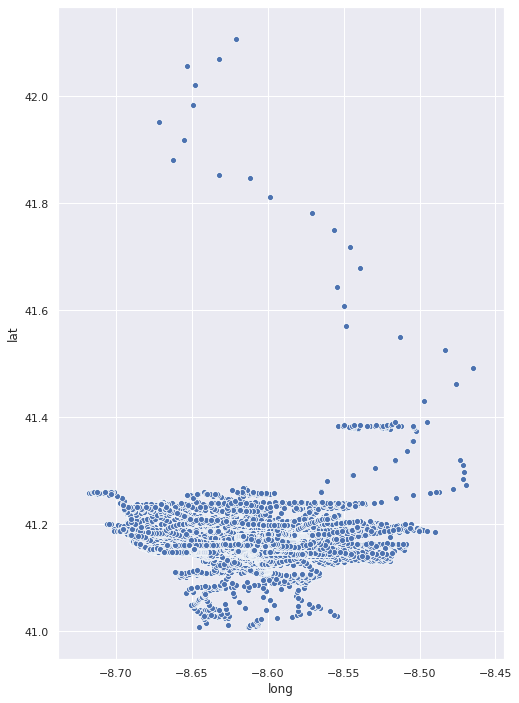

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
trips = pd.read_csv("https://gist.githubusercontent.com/krisrs1128/488cac4d318d3c4a9a0716cadc1d350b/raw/48109d825f349a56a86538b48bfe07b16da9df42/interpolated_small.csv")

sns.set(rc={'figure.figsize':(8, 12)})
sns.scatterplot(x="long", y="lat", data=trips)

(b) and (c). We can filter the data directly, through indexing. The only thing tricky with the plot is making the aspect ratio seem reasonable.

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


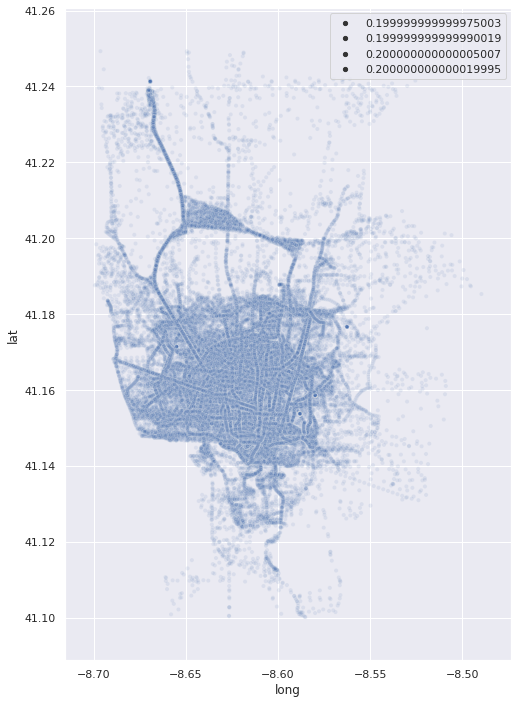

In [2]:
trips = trips[
    np.bitwise_and(trips.lat > 41.1, trips.lat < 41.25) *
    np.bitwise_and(trips.long > -8.7, trips.long < 8.55)
]
sns.set(rc={'figure.figsize':(8, 12)}) # fix aspect ratio
sns.scatterplot(x="long", y="lat", data=trips, size=0.2, alpha=0.1)

(d) We can use pivot_table to make the data wide, and then use `KMeans` in sklearn. One issue is that, as an artifact of interpolation, some of the data are NA. We have to remove those before we can run K-means.

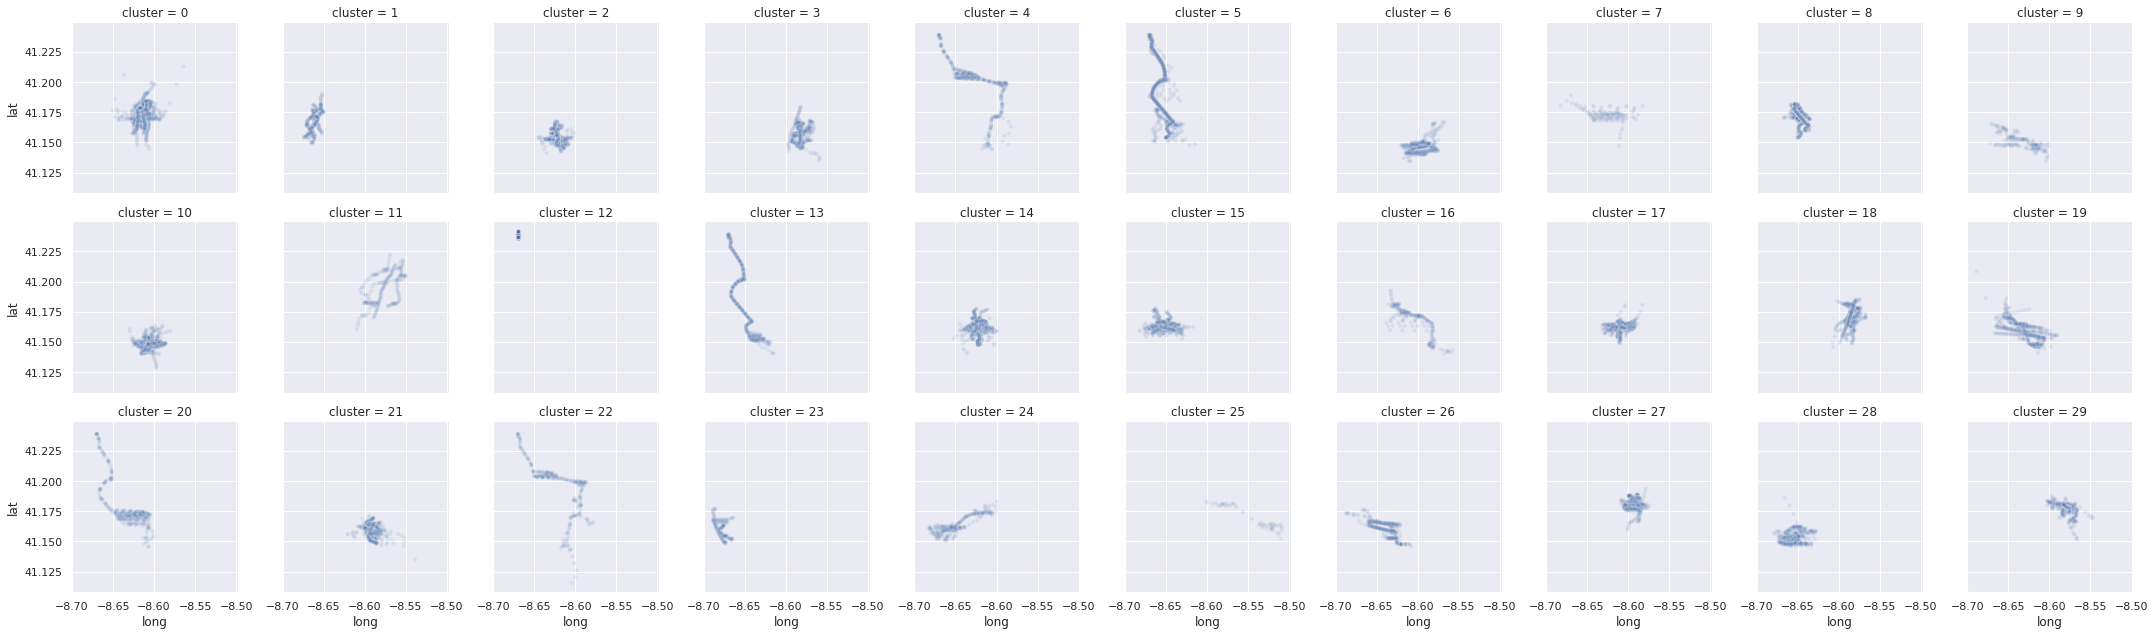

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

trips_wide = trips.pivot_table(index=["id"], columns=["trip_progress"])
cluster_model = KMeans(n_clusters=200)

# filter trajectories with missing values
missing_ix = [np.any(np.isnan(trips_wide.iloc[i, :])) for i in range(trips_wide.shape[0])]
trips_wide = trips_wide[~np.array(missing_ix)]
cluster_model.fit(trips_wide)
groups =  pd.DataFrame({"id": trips_wide.index, "cluster": cluster_model.labels_})

# merge cluster information with raw trip data
trips_merged = trips.merge(groups)
g = sns.FacetGrid(data=trips_merged[trips_merged["cluster"] < 30], col="cluster", col_wrap=10)
g.map(sns.scatterplot, "long", "lat", size=0.3, alpha=0.1)

(e) You could, for example, create a new column called "duration" including the durations of the trips. By scaling it (multiplying by 100 or 0.01, say), you could have this column exert more or less influence on the final clustering, relative to the raw trajectories.

## Dimensionality Reduction

4. Consider the numbers $\lambda_1 = \|z_1\|_{2},\dots, \lambda_{p} = \|z_{p}\|_{2}$, giving the proportion of variance explained, as in equation ISLR (10.7). Define the statistics $\sum_{k = 1}^{p} \left(\lambda_k - \bar{\lambda}\right)^2$, where $\bar{\lambda}$ is the average of all the $\lambda_1, \dots, \lambda_p$. Discuss the relative usefulness of dimensionality reduction when this statistic is large vs. small.

Solution:  When the statistic is large, there is a large variance in the eigenvalues of associated with the PC directions. Therefore, a few of the directions will be  much more informative than others, and linear dimensionality will be expected to be useful. On the other hand, when it is small, there is no small set of PCs that will capture most of this variance.

5. [ISLR 10.7.6] A researcher collects expression measurements for 1000 genes in 100 tissue samples. The data can be written as a $1000 \times 100$ matrix which we call $\mathbf{X}$, in which each row represents a gene and each column a tissue sample. Each tissue sample was processed on a different day, and the columns of $\mathbf{X}$ are ordered so that the samples that were processed earliest are on the left, and the samples that were processed later are on the right. The tissue samples belong to two groups: control (C) and treatment (T). The C and T samples were processed in a random order across the days. The researcher wishes to determine whether each gene's expression measurements differ between the treatment adn control groups.

  As a pre-analysis (before comparing T vs. C), the researcher performs a principal component analysis, and finds that the first principal component (a vector of length 100) has a strong linear trend from left to right, and explains 10% of the variation. The researcher now remembers that each patient sample was run on one of the two machines, A and B, and machine A was used more often in earlier times while B was used more often later. The researcher has a record of which sample was run on which machine.

  a. Explain what it means that the first principal component "explains 10% of the variation".
  
  b. The researcher decides to replace the $\left(j, i\right)^{th}$ element of $\mathbf{X}$ with
  
  $$x_{ji} - \varphi_{ji}z_{i1}$$
  
  where $z_{i1}$ is the $i^{th}$ score and $\varphi_{j1}$ is the $j^{th}$ loading, for the first principal component. He will then perform a two-sample $t$-test on each gene in this new dataset in order to determine whether its expression differs between the two conditions. Critique this idea, and suggest a better approach. (The principal component analysis is performed on $X^{T}$).
  
  c.  Design and run a small simulation experiment  to demonstrate the superiority of your idea.

Solution: (a) Let $\lambda_1, \dots, \lambda_{100}$ be the eigenvalues associated with the PCA. The statement means $\frac{\lambda_1}{\sum_{k = 1}^{100} \lambda_k} \approx 0.1$. Geometrically, the longest axis in the ellipse approximating the 100 points in the 1000-dimensional data space has length that's about 10% of the sum over all the axes in that ellipse.

(b) It seems that the researcher wanted to do this in order to remove the confounding effect the machines might have had on the observed expression counts. However, you can directly control for the machine effect, rather than indirectly capturing it through the principal component: For each gene, compute the means of the samples from the two machine groups,  and subtract that out, so that the machine effect is no longr observable.

6. The dataset [here](https://gist.githubusercontent.com/krisrs1128/a95d2b556fd26a1872a46033691a58f2/raw/ee33653756d786e0f262fd665024d4814c4df81c/ebd_counts.csv) is a sample of data from the eBird app, a platform that has been used for citizen science related to birdwatching.

  a. Perform a PCA on the square-root of the counts. Plot the second principal component loadings as a function of the date during which the observation was made. Discuss.
  
  b. Plot the species coordinates for the coming from the first two PCA dimensions. Based on the figure, is it more likely that you would observe Yellow-bellied Sapsucker and a White-throated Sparrow in the same environment, or the Yellow-bellied Sapsucker and a Double-crested Cormorant in the same environment? Justify your conclusion.
  
  c. [optional] Why are bird names so much fun to say?


Solution: 

(a) We use the PCA routine in `sklearn`.

In [0]:
import pandas as pd
from sklearn.decomposition import PCA

ebd = pd.read_csv("https://gist.githubusercontent.com/krisrs1128/a95d2b556fd26a1872a46033691a58f2/raw/ee33653756d786e0f262fd665024d4814c4df81c/ebd_counts.csv")
ebd["date"] = pd.to_datetime(ebd["date"])

# pca on the square roots
X = np.sqrt(ebd.iloc[:, 3:].T)
pca_model = PCA(n_components=10)
scores = pca_model.fit_transform(X)


It seems that the first few dates have somewhat larger values on the first PC axis. One early sample in particular seems to have a very large score -- this is likely a sample with more recorded sightings than the rest.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(736695.0, 736725.0)

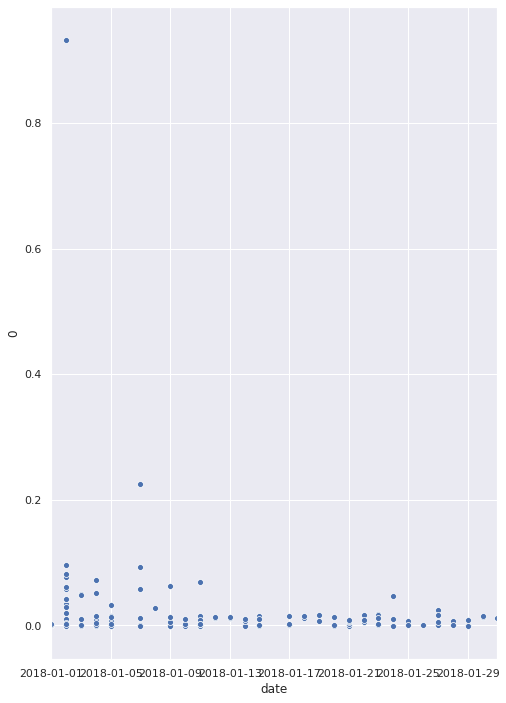

In [5]:
comps = pd.concat([ebd.iloc[:,  :3], pd.DataFrame(pca_model.components_.T)], axis=1)
sns.scatterplot(x="date", y=0, data=comps)
plt.xlim(ebd["date"].min(), ebd["date"].max())

In [0]:
scores = pd.DataFrame(scores)
scores["species"] = ebd.iloc[:, 3:].columns

(-3.5, 8.5)

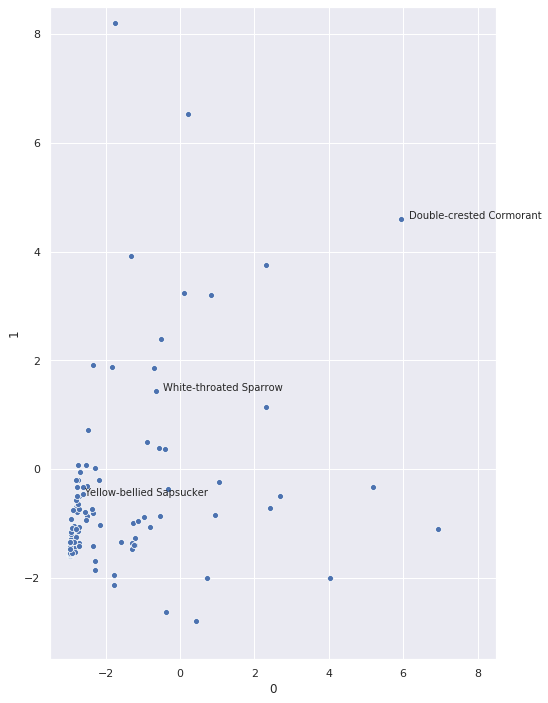

In [7]:
pca_plot = sns.scatterplot(x=0, y=1, data=scores)
lim = 8.5

for i in range(scores.shape[0]):
  if not scores.species[i] in ["Double-crested Cormorant", "White-throated Sparrow", "Yellow-bellied Sapsucker"]: continue
  pca_plot.text(scores[0][i]+0.2, scores[1][i], scores.species[i], horizontalalignment='left', size='small')
    
sns.set(rc={'figure.figsize':(8, 8)})
plt.xlim(-3.5, lim)
plt.ylim(-3.5, lim)

(b) The yellow-bellied sapsucker and double-crested comorant are at 180 degrees from one another: Seeing one makes the expected count of the other *decrease*. On the other hand the white-throated sparrow is at about 90 degrees to the sapsucker, so its count is generally unrelated. So, we'd be surprised to see the double-created cormorant in the same environment as a sapsucker, but not so surprised if we saw a sparrow.

(c) ????